In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from collections import Counter
import time
import sys

In [16]:
filenames = ["../input/all-news/articles1.csv", "../input/all-news/articles2.csv", "../input/all-news/articles3.csv"]
dfs = [pd.read_csv(filename, index_col="Unnamed: 0") for filename in filenames]
df = pd.concat(dfs, axis=0)
# df1 = pd.read_csv("../input/all-news/articles1.csv")
# df2 = pd.read_csv("../input/all-news/articles2.csv")
# df3 = pd.read_csv("../input/all-news/articles3.csv")

In [47]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
import string

stemmer = PorterStemmer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
progress = 0 #for keeping track of where the function is

def stem(x, l):
#     progress = 0
    end = time.time()
    dirty = word_tokenize(x)
    tokens = []
    for word in dirty:
        if word.strip('.') == '': #this deals with the bug
            pass
        elif re.search(r'\d{1,}', word): #getting rid of digits
            pass
        elif re.search(r'[,\.!?()—:;-]', word):
            pass
        else:
            tokens.append(word.strip('.').translate(string.punctuation))
            
    global start
    global progress
    tokens = pos_tag(tokens) # get part of speech
    progress += 1
    stems = ' '.join(stemmer.stem(key.lower()) for key, value in  tokens if value != 'NNP') #getting rid of proper nouns
 
    end = time.time()
    sys.stdout.write('\r {} percent, {} position'.format(str(float(progress / l)), 
                                                                         str(progress))) 
    start = time.time()
    return stems

In [21]:
start = time.time()
df['stems'] = df.content.apply(lambda x: stem(x, len(df)))

 1.0 percent, 142570 position142569 positionn

In [36]:
df = pd.read_csv("../input/all_articles_stem.csv")

In [5]:
df[['title', 'publication', 'content', 'stems']]

,title,publication,content,stems
0,House Republicans Fret About Winning Their Hea...,New York Times,WASHINGTON — Congressional Republicans have...,republican have a new fear when it come to the...
1,Rift Between Officers and Residents as Killing...,New York Times,"After the bullet shells get counted, the blood...","after the bullet shell get count , the blood d..."
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,"When Walt Disney’s “Bambi” opened in 1942, cri...","when s open in , critic prais it spare , haunt..."
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,"Death may be the great equalizer, but it isn’t...","death may be the great equal , but it isn ’ t ..."
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,"SEOUL, South Korea — North Korea’s leader, ...",", s leader , said on that hi countri wa make f..."
5,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,"LONDON — Queen Elizabeth II, who has been b...",", who ha been battl a cold for more than a wee..."
6,Taiwan’s President Accuses China of Renewed In...,New York Times,BEIJING — President Tsai of Taiwan sharpl...,"of sharpli critic s leader on , say they had r..."
7,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,"Danny Cahill stood, slightly dazed, in a blizz...","stood , slightli daze , in a blizzard of confe..."
8,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,"Just how is Hillary Kerr, the founder of ...","just how is hillari , the founder of a digit m..."
9,Calling on Angels While Enduring the Trials of...,New York Times,Angels are everywhere in the Muñiz family’s ap...,angel are everywher in the famili s apart in t...


# D2V Word Embeddings

In [27]:
df.stems.values.tolist()[0]

'republican have a new fear when it come to their health care lawsuit against the administr : they might win the incom administr could choos to no longer defend the execut branch against the suit , which challeng the administr s author to spend billion of dollar on health insur subsidi for and american , hand republican a big victori on issu but a sudden loss of the disput subsidi could conceiv caus the health care program to implod , leav million of peopl without access to health insur befor republican have prepar a replac that could lead to chao in the insur market and spur a polit backlash just as republican gain full control of the govern to stave off that outcom , republican could find themselv in the awkward posit of appropri huge sum to temporarili prop up the health care law , anger conserv voter who have been demand an end to the law for year in anoth twist , s administr , worri about preserv execut branch prerog , could choos to fight it republican alli in the on some central

In [28]:
from gensim import models
sentences = df.stems.values.tolist()

doc2vecSentence = [models.doc2vec.LabeledSentence(words=sentences[x], tags=["DOC_"+str(x)]) for x in range(0,len(sentences)) ]
model = models.Doc2Vec(dbow_words =1,
                        min_count = 50, 
                        epochs = 15)
model.build_vocab(doc2vecSentence)

for epoch in range(15):
    print("Training for epoch", epoch)
    model.train(doc2vecSentence, total_examples=len(doc2vecSentence), epochs=15)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


Training for epoch 0
Training for epoch 1
Training for epoch 2
Training for epoch 3
Training for epoch 4
Training for epoch 5
Training for epoch 6
Training for epoch 7
Training for epoch 8
Training for epoch 9
Training for epoch 10
Training for epoch 11
Training for epoch 12
Training for epoch 13
Training for epoch 14


In [29]:
model.save("model_doc2vec_15epochs")

In [3]:
from gensim.models.doc2vec import Doc2Vec

model = Doc2Vec.load("model_doc2vec_15epochs")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Create vectors

In [27]:
# get vector data
# X = model[model.wv.vocab]
X = list(model.docvecs.doctag_syn0)
model.docvecs[500] == X[500]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Approach 1 : embeddings  + kmeans

Here we will :
1. Create document embeddings
2. Cluster using KMeans 

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

NameError: name 'X' is not defined

In [14]:
X[0]

array([-0.38728666, -0.12097728, -0.62089115, -0.7965735 , -1.4189253 ,
        0.0092422 , -1.2621307 , -2.0785494 ,  1.175474  ,  0.28162518,
       -1.7882627 ,  0.90165293,  0.89465046, -1.0222764 ,  0.8201918 ,
        0.2826993 ,  1.8203522 ,  0.04660658,  1.612914  , -0.9615739 ,
        0.05149659, -0.16047117, -0.12040743, -1.0422508 ,  0.29929945,
        0.7625042 ,  0.9313656 , -0.0944729 , -1.3936354 ,  1.1047071 ,
        0.19869567,  0.2514671 ,  0.3637965 , -0.20530376,  0.11757084,
       -0.92769414,  0.98440677, -0.5504288 , -1.2702776 , -0.37504652,
       -0.12428758,  0.27677095,  0.54931915, -0.4830302 , -0.187783  ,
       -1.7635976 , -0.6226278 , -0.35403496, -0.25905216, -0.28806967,
        0.6744175 , -0.18904595,  0.03217316,  1.396606  , -1.1473104 ,
       -0.7642996 ,  0.21999928,  1.2349946 ,  1.2104609 , -1.957876  ,
        0.42307013,  1.5537639 ,  0.571068  ,  0.9440103 , -0.18716586,
       -0.22579989,  0.99088216,  1.6017236 ,  0.3533102 , -1.10

In [23]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_samples(X[:1000], labels[:1000], metric='cosine')
 
print ("Silhouette_score: ")
print (silhouette_score)

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-8620855.374793684
Silhouette_score: 
[ 6.19274937e-02  5.92789724e-02 -3.36577161e-03  8.28088298e-02
  9.24039409e-02  7.65370280e-02 -3.38467844e-02  8.86341110e-02
  2.82063950e-02  1.16851971e-01  1.35189220e-01  1.14599340e-01
  1.79257527e-01  1.70911774e-01  1.48043126e-01 -3.29006948e-02
  7.43123665e-02  1.68422580e-01  2.07806416e-02  1.07036203e-01
 -3.04924622e-02 -3.47394729e-03 -3.76672223e-02 -6.91197887e-02
  3.07988971e-02 -1.98660456e-02  9.94789079e-02  1.77456230e-01
  4.94303741e-02  9.53989625e-02  2.05935668e-02  6.75352663e-02
  1.80705339e-02  1.43173575e-01  1.85246095e-01  2.84197051e-02
 -3.75709459e-02  3.84754650e-02  1.27963260e-01  1.55039784e-03
 -1.26847073e-01  5.60708791e-02  1.85519848e-02  1.34481773e-01
  1.57882720e-01  1.39048219e-01  1.91749647e-01 -1.08959481e-01
  7.78456852e-02  5.97005524e-02  1.59721181e-01  1.

In [37]:
## Assign the labels
df["clust"] = labels
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,stems,clust
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,republican have a new fear when it come to the...,1
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","after the bullet shell get count , the blood d...",1
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","when s open in , critic prais it spare , haunt...",0
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","death may be the great equal , but it isn ’ t ...",2
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",", s leader , said on that hi countri wa make f...",3


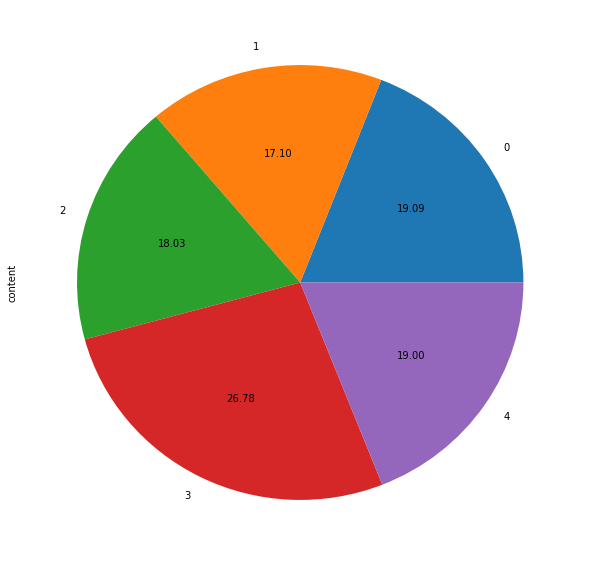

In [30]:
# Check count of news articles in each cluster
df.groupby("clust" )["content"].count().plot(kind = "pie", autopct='%.2f', figsize = (10, 10))

In [5]:
import json

with open('C:/Users/Aman/TopicModeling/input/test-article-scraper/scraped-articles/venezuela-articles.json', 'r') as f:
    data = json.load(f)
hw = pd.read_json("../input/test-article-scraper/scraped-articles/venezuela-articles.json", orient="columns")
hw.head()

,source,text,title,url
0,https://www.nytimes.com,Venezuela’s political and economic crisis took...,Opinion | Venezuela: Between Maduro and a Hard...,https://www.nytimes.com/2019/01/24/opinion/ven...
1,https://www.nytimes.com,"Maduro offers an olive branch, while his polic...","China, Venezuela, Climate Change: Your Thursda...",https://www.nytimes.com/2019/01/30/briefing/ch...
2,https://www.nytimes.com,"Germany, France, Spain and Britain were also a...",Venezuelan President Does an About-Face That A...,https://www.nytimes.com/2019/01/26/world/ameri...
3,https://www.nytimes.com,The Venezuelan military has blockaded a major ...,To Block Aid Organized by Venezuela Opposition...,https://www.nytimes.com/2019/02/07/world/ameri...
4,https://www.nytimes.com,"CARACAS, Venezuela — Risking arrest, Venezuela...",Venezuela’s Opposition Leader Calls for More P...,https://www.nytimes.com/2019/01/25/world/ameri...


In [33]:
from urllib.parse import urlparse

def getSource(url):   
    print(url)
    parsed_uri = urlparse(url)
    result = '{uri.netloc}/'.format(uri=parsed_uri)
    if (len(result.split('.')) == 2):
        return result.split('.')[0]
    else:
        return result.split('.')[1]

#hw['sourceName'] = hw['source'].apply(getSource)

In [20]:
hw['stems'] = hw["text"].apply(lambda x: stem(x, len(hw)))

 2.0 percent, 200 positionn

In [9]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    regressors = [model.infer_vector(doc, epochs=20) for doc in sents]
    return list(regressors)

hwX = vec_for_learning(model, hw["stems"])

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(hwX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(hwX))
 
silhouette_score = metrics.silhouette_samples(hwX, labels, metric='cosine')
 
print ("Silhouette_score: ")
print (silhouette_score)

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.08175111412901165
Silhouette_score: 
[ 0.04083023  0.02195768  0.05379983 -0.07836002 -0.0517186   0.03667327
  0.03667327 -0.00291132 -0.11022189 -0.00333304 -0.09123058 -0.04538872
 -0.21677825 -0.02366681 -0.04961295  0.03741074 -0.00105757 -0.05526177
 -0.11489931 -0.04769879  0.00419646  0.03667327 -0.01950651  0.06531832
 -0.17881005 -0.004443   -0.07924081  0.04184914 -0.12115104 -0.00970934
 -0.00619749 -0.00105757 -0.0310472  -0.04822837 -0.14724134 -0.03030875
  0.46321657  0.01996595  0.04146891  0.04890761  0.04772292 -0.01063588
  0.562799   -0.01735255  0.0454396   0.          0.5215708   0.00400279
 -0.02585768  0.05289242  0.06871441 -0.14896709 -0.05420708  0.0249067
 -0.01598348 -0.10716854 -0.00898827  0.03341285  0.0384473  -0.02338143
  0.0119941  -0.09750387 -0.05608821 -0.03137593  0.02095805 -0.04037262
 -0.07625383  0.06709231 -0.

In [24]:
## Assign the labels
hw["clust"] = labels
hw.head()

,source,text,title,url,sourceName,stems,clust
0,https://www.nytimes.com,Venezuela’s political and economic crisis took...,Opinion | Venezuela: Between Maduro and a Hard...,https://www.nytimes.com/2019/01/24/opinion/ven...,nytimes,s polit and econom crisi took a fate turn on w...,0
1,https://www.nytimes.com,"Maduro offers an olive branch, while his polic...","China, Venezuela, Climate Change: Your Thursda...",https://www.nytimes.com/2019/01/30/briefing/ch...,nytimes,offer an oliv branch while hi polic crack the ...,4
2,https://www.nytimes.com,"Germany, France, Spain and Britain were also a...",Venezuelan President Does an About-Face That A...,https://www.nytimes.com/2019/01/26/world/ameri...,nytimes,and were also among the nation call on to comm...,1
3,https://www.nytimes.com,The Venezuelan military has blockaded a major ...,To Block Aid Organized by Venezuela Opposition...,https://www.nytimes.com/2019/02/07/world/ameri...,nytimes,the militari ha blockad a major highway link w...,0
4,https://www.nytimes.com,"CARACAS, Venezuela — Risking arrest, Venezuela...",Venezuela’s Opposition Leader Calls for More P...,https://www.nytimes.com/2019/01/25/world/ameri...,nytimes,arrest s opposit leader attend a ralli on in h...,4


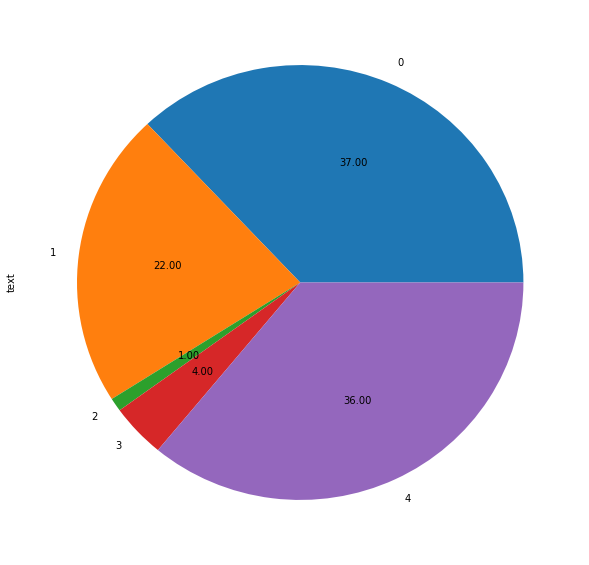

In [25]:
hw.groupby("clust" )["text"].count().plot(kind = "pie", autopct='%.2f', figsize = (10, 10))

In [148]:
hw0 = hw.loc[hw['clust'] == 0]
hw0["title2"] =  hw0["title"].apply(lambda x : remove_sw(x))
print(get_top_n_bigrams(list(hw0["title2"]))[:10])
print(get_top_n_trigrams(list(hw0["title2"]))[:10])
print(get_top_n_quadgrams(list(hw0["title2"]))[:10])

[('huawei executive', 10), ('huawei cfo', 9), ('china huawei', 6), ('meng wanzhou', 6), ('trade secrets', 5), ('ambassador china', 5), ('charges huawei', 4), ('huawei stealing', 4), ('executive meng', 4), ('10 things', 4)]
[('huawei executive meng', 4), ('executive meng wanzhou', 4), ('huawei stealing trade', 3), ('stealing trade secrets', 3), ('canada ambassador china', 3), ('us charges huawei', 2), ('chinese tech giant', 2), ('tech giant huawei', 2), ('china detains australian', 2), ('alleged trade secret', 2)]
[('huawei executive meng wanzhou', 4), ('huawei stealing trade secrets', 3), ('chinese tech giant huawei', 2), ('alleged trade secret theft', 2), ('10 things tech need', 2), ('things tech need know', 2), ('tech need know today', 2), ('10 things need know', 2), ('things need know opening', 2), ('need know opening bell', 2)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [152]:
hw1 = hw.loc[hw['clust'] == 1]
hw1["title2"] =  hw1["title"].apply(lambda x : remove_sw(x))
hw1["title"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


11    Huawei confident in uncomfortable times
Name: title, dtype: object

In [153]:
hw2 = hw.loc[hw['clust'] == 2]
hw2["title"]

65    Australian's detention in China 'directly link...
Name: title, dtype: object

In [154]:
hw3 = hw.loc[hw['clust'] == 3]
hw3["title"]

83    Huawei's founder faces fight for company and f...
Name: title, dtype: object

In [163]:
hw.head()

,source,text,title,url,sourceName,stems,clust
0,https://www.engadget.com,Prosecutors in Washington state say Huawei sto...,US charges Huawei with stealing trade secrets ...,https://www.engadget.com/2019/01/28/us-huawei-...,engadget,prosecutor in state say stole trade secret fro...,0
1,https://www.wired.com,Bad news keeps piling up for Chinese telecommu...,"Huawei's Many Troubles: Bans, Alleged Spies, a...",https://www.wired.com/story/huaweis-many-troub...,wired,news keep pile up for chines telecommun giant ...,0
2,http://techcrunch.com,The US-China tension over Huawei is leaving te...,Canada’s Telus says partner Huawei is ‘reliabl...,http://techcrunch.com/2019/01/20/telus-backs-h...,techcrunch,the tension over is leav telecommun compani ar...,0
3,http://techcrunch.com,The Daily Crunch is TechCrunch’s roundup of ou...,Daily Crunch: Prosecutors may be building a cr...,http://techcrunch.com/2019/01/17/daily-crunch-...,techcrunch,the is techcrunch s roundup of our biggest and...,0
4,https://gizmodo.com,Photo: Getty / Chip Somodevilla\n\nThe U.S. Ju...,"DOJ Charges China's Huawei, Alleging Fraud, Ob...",https://gizmodo.com/doj-charges-chinas-huawei-...,gizmodo,the on announc two indict against the chines t...,0


In [26]:
hwShort = hw[["sourceName", "url", "title", "clust"]]
with open("./venezuela_test.json", "w+") as output_file:
    output_file.write(hwShort.to_json(orient="index"))

In [29]:
h = pd.read_json("../input/test-article-scraper/scraped-articles/venezuela-articles.json", orient="columns")
getDate(h["date"][0])

'Feb 21, 2019'

In [28]:
def getDate(d):
    return d.date().strftime('%b %d, %Y')

In [35]:
def runCluster_Kmeans(path_to_json, name):

    hw = pd.read_json(path_to_json, orient="columns")
    hw['sourceName'] = hw['url'].apply(getSource)
    hw['date'] = hw["date"].apply(getDate)
    hw['stems'] = hw["text"].apply(lambda x: stem(x, len(hw)))
    
    hwX = vec_for_learning(model, hw["stems"])
    
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(hwX)
    
    labels = kmeans.labels_
    hw["clust"] = labels
    
    hwShort = hw[["sourceName", "url", "title", "clust", "description", "date"]]
    
    jsonName = "./" + str(name) +'.json'
    with open(jsonName, "w+") as output_file:
        output_file.write(hwShort.to_json(orient="index"))

#runCluster_Kmeans("../input/test-article-scraper/scraped-articles/venezuela-articles.json", "venezuela")   
runCluster_Kmeans("../input/test-article-scraper/scraped-articles/huawei-articles.json", "huawei")
#runCluster_Kmeans("../input/test-article-scraper/scraped-articles/shutdown-articles.json", "shutdown")    

https://www.wired.com/story/us-lawyers-dont-buy-huaweis-argument-chinese-hacking/
http://techcrunch.com/2019/03/01/canadian-government-allows-huawei-cfos-us-extradition-case-to-proceed-%e2%80%a8/
http://techcrunch.com/2019/03/04/huawei-reportedly-plans-to-sue-us-government-over-ban/
http://techcrunch.com/2019/03/06/huawei-sues-us-government/
https://gizmodo.com/huaweis-wild-week-ends-with-canada-approving-extraditio-1832999229
https://gizmodo.com/china-says-two-canadian-citizens-are-spies-as-extraditi-1833035137
https://gizmodo.com/huawei-now-just-trolling-u-s-by-dredging-up-nsa-spying-1832925885
https://gizmodo.com/chinese-tech-giant-huawei-plans-to-sue-the-us-governmen-1833030662
https://gizmodo.com/huawei-ceo-says-u-s-just-isnt-that-important-pinky-sw-1832724421
https://mashable.com/article/huawei-founder-bbc-interview/
https://www.nytimes.com/2019/03/04/world/canada/huawei-canada-meng-wanzhou.html
https://www.bbc.co.uk/news/business-47478587
https://www.reuters.com/article/us-usa-c

 9.24742268041237 percent, 897 positionn

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Remove Stop[words
def remove_sw(x):
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize

    example_sent = x.lower()
    
    custom_stopwords_list = [
        "new york times", #publication
        "breitbart", #publication
        "also",
        "said",
        "mr",
        "mrs",
        "im",
        "would",
        "could",
        "should",
        "first",
        "like",
        "dont",
        "wont",
        "get",
        "going"
    ]
    for x in custom_stopwords_list : 
        example_sent = example_sent.replace(x, "")
    
    stop_words = set(stopwords.words('english'))
    stop_words = [x.lower() for x in stop_words]
    word_tokens = word_tokenize(example_sent)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)

def get_top_n_bigrams(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer(max_df=0.85, ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigrams(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer(max_df=0.85, ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_quadgrams(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer(max_df=0.85, ngram_range=(4,4)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
df1 = df.loc[df['clust'] == 1]
df1["title2"] =  df1["title"].apply(lambda x : remove_sw(x))
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,id,title,publication,author,date,year,month,url,content,stems,clust,title2
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,republican have a new fear when it come to the...,1,house republicans fret winning health care suit -
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","after the bullet shell get count , the blood d...",1,rift officers residents killings persist south...
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...,angel are everywher in the famili s apart in t...,1,calling angels enduring trials job -
10,10,17293,Weak Federal Powers Could Limit Trump’s Climat...,New York Times,Justin Gillis,2017-01-03,2017.0,1.0,NaN,With Donald J. Trump about to take control of ...,"with about to take control of the , it would s...",1,weak federal powers lit trump ’ clate-policy r...
11,11,17294,Can Carbon Capture Technology Prosper Under Tr...,New York Times,John Schwartz,2017-01-05,2017.0,1.0,NaN,"THOMPSONS, Tex. — Can one of the most promi...",", one of the most promis — and troubl — techno...",1,carbon capture technology prosper trump ? -


In [62]:
print(get_top_n_bigrams(list(df1["title2"]))[:10])
print(get_top_n_trigrams(list(df1["title2"]))[:10])
print(get_top_n_quadgrams(list(df1["title2"]))[:10])

[('donald trump', 573), ('wall street', 260), ('hillary clinton', 240), ('new york', 228), ('health care', 182), ('white house', 150), ('wells fargo', 114), ('bernie sanders', 108), ('year old', 94), ('silicon valley', 80)]
[('health care bill', 45), ('new york city', 44), ('dakota access pipeline', 32), ('black lives matter', 21), ('wells fargo ceo', 21), ('gop health care', 21), ('self driving car', 20), ('trump tax plan', 18), ('donald trump tax', 17), ('air force one', 17)]
[('trump interests vs america', 16), ('gop health care bill', 13), ('republican health care bill', 9), ('hillary clinton donald trump', 7), ('new york attorney general', 7), ('many scandals donald trump', 7), ('scandals donald trump cheat', 7), ('donald trump cheat sheet', 7), ('american health care act', 6), ('trump walk fame star', 6)]


In [59]:
df2 = df.loc[df['clust'] == 2]
df2["title2"] =  df2["title"].apply(lambda x : remove_sw(x))
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,id,title,publication,author,date,year,month,url,content,stems,clust,title2
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","death may be the great equal , but it isn ’ t ...",2,"among deaths 2016 , heavy toll pop music -"
13,13,17296,How to form healthy habits in your 20s - The N...,New York Times,Charles Duhigg,2017-01-02,2017.0,1.0,NaN,This article is part of a series aimed at help...,thi articl is part of a seri aim at help you n...,2,form healthy habits 20s -
14,14,17297,Turning Your Vacation Photos Into Works of Art...,New York Times,Stephanie Rosenbloom,2017-04-14,2017.0,4.0,NaN,It’s the season for family travel and photos ...,it ’ s the season for famili travel and photo ...,2,turning vacation photos works art -
26,26,17312,"Istanbul, Donald Trump, Benjamin Netanyahu: Yo...",New York Times,Charles McDermid,2017-01-03,2017.0,1.0,NaN,Good morning. Here’s what you need to know: •...,good morn here ’ s what you need to know : • t...,2,"istanbul , donald trump , benjamin netanyahu :..."
30,30,17318,Tips for Your Post-Holiday Clutter Purge - The...,New York Times,Michelle Higgins,2017-04-11,2017.0,4.0,NaN,With the year winding down and New Year’s reso...,with the year wind down and s resolut just aro...,2,tips post-holiday clutter purge -


In [63]:
print(get_top_n_bigrams(list(df2["title2"]))[:10])
print(get_top_n_trigrams(list(df2["title2"]))[:10])
print(get_top_n_quadgrams(list(df2["title2"]))[:10])

[('donald trump', 1167), ('hillary clinton', 458), ('white house', 181), ('evening briefing', 168), ('new york', 130), ('ted cruz', 129), ('bernie sanders', 119), ('health care', 111), ('supreme court', 95), ('paul ryan', 94)]
[('black lives matter', 44), ('wednesday evening briefing', 36), ('friday evening briefing', 34), ('thursday evening briefing', 31), ('monday evening briefing', 30), ('tuesday evening briefing', 27), ('health care bill', 26), ('cnn student news', 26), ('hillary clinton donald', 25), ('clinton donald trump', 25)]
[('hillary clinton donald trump', 25), ('atlantic politics policy daily', 21), ('donald trump hillary clinton', 15), ('cnn student news september', 12), ('week pop culture writing', 9), ('white house correspondents dinner', 8), ('cnn student news august', 8), ('whitewater benghazi clinton scandal', 8), ('benghazi clinton scandal prer', 8), ('game thrones season episode', 7)]
